# Feature Visualization - Diversity of Features

This short notebook explores the diversity of features represented in a component of a model, following the similar content in these two notebooks ([1](https://github.com/tensorflow/lucid/blob/master/notebooks/feature-visualization/neuron_interaction.ipynb), [2](https://github.com/tensorflow/lucid/blob/master/notebooks/feature-visualization/neuron_diversity.ipynb)) provided in the [Lucid](https://github.com/tensorflow/lucid) repository.

## Imports and Setups

In [ ]:
import tensorflow as tf
assert tf.__version__.startswith('2')

from mini_lucid_tf2 import objectives, render

In [ ]:
# load a pre-trained model (without specifying any input shape!) and freeze its weights
inception_v3 = tf.keras.applications.InceptionV3(include_top=False)
inception_v3.trainable = False

# specify the size of images (height and width) to be generated
IMAGE_SIZE = 299

87916544/87910968 [==============================] - 1s 0us/step


## Diversity in a Single Layer

Given a layer in a model, it is possible (with some time) to obtain visualizations of every channel. However, the channels only represent particular directions in a feature space, in which there are infinitely many other directions.

For example, we can interpolate between two channels and obtain a continuous family of visualizations. 

Step 200


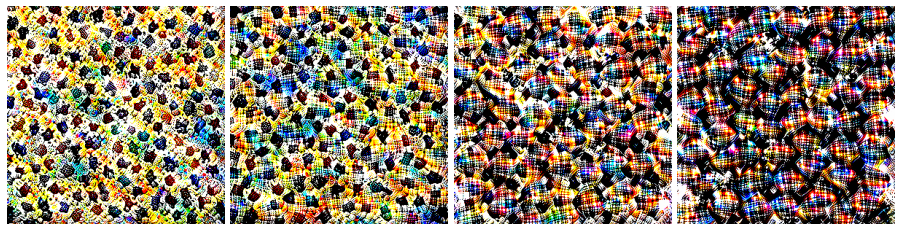

In [ ]:
# linear interpolation between two channels

obj = objectives.InterpolatedChannels(inception_v3, 'mixed3', 662, 704, intervals=3)
_ = render.render_vis(obj, IMAGE_SIZE) 

# note: batch size is inferred from the objective and doesn't need to be specified

## Diversity in a Single Channel

Even a single channel may encompass a variety of features, corresponding to different maxima of the same objective function. One way of revealing this variety is to penalize similarity of optimization outcomes within a batch.

Step 200


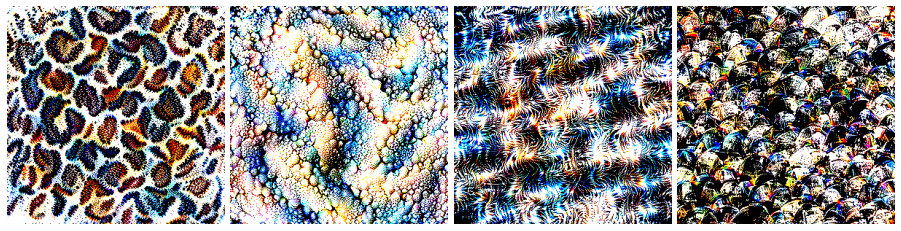

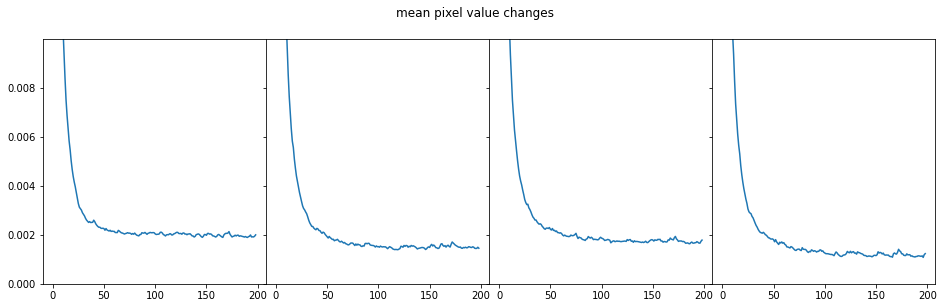

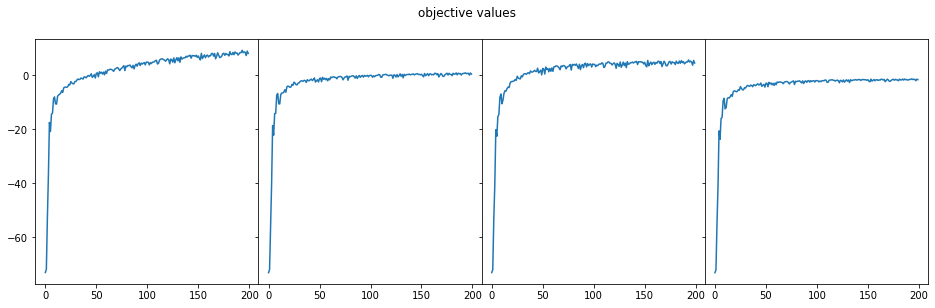

In [ ]:
# penalize similarity based on a Gram matrix

obj_gen = objectives.LayerObjectiveFactory(inception_v3, 'mixed5')
obj = obj_gen(objectives.Channel, 676) - obj_gen(objectives.GramCosSim) * 100
_ = render.render_vis(obj, IMAGE_SIZE, batch=4, display_plots=True)  

# note: batch size can't be inferred and needs to be specified (or defaults to 1)